### Task: Determine the eligibility for granting a Home Loan
Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.

#### Load the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Basic data exploration

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
data.describe(include = ['object'])

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

In [9]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data.isna().sum() / data.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
## separate categorical and numeric features.
# catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols.remove('Loan_Status')
cat_cols.append('Credit_History')
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [12]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('Credit_History')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#### Univariate Data Analysis

In [13]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
# Prediction target
data["Loan_Status"].value_counts() / 614 * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

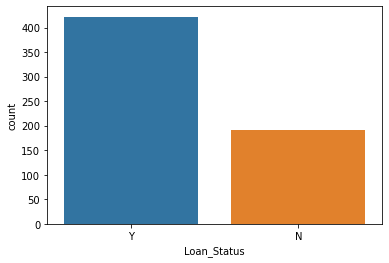

In [15]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

<AxesSubplot:>

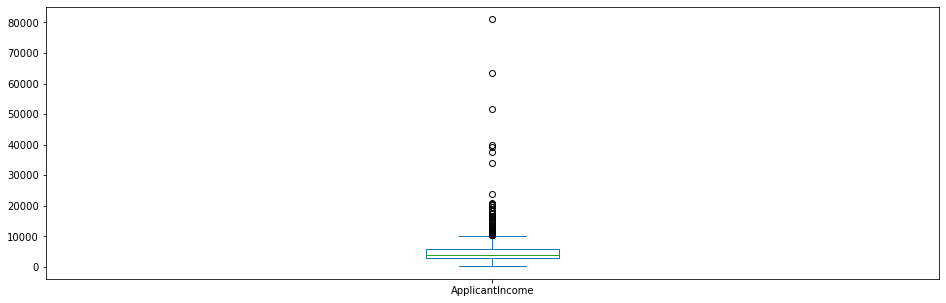

In [16]:
plt.figure()
data["ApplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

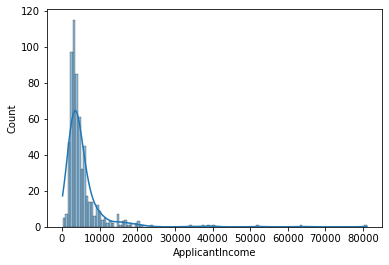

In [17]:
sns.histplot(data["ApplicantIncome"], kde=True)

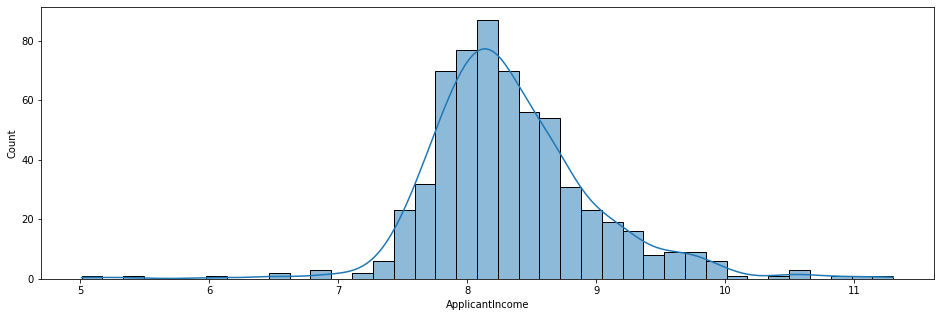

In [18]:
plt.figure(figsize=(16, 5))
sns.histplot(np.log(data["ApplicantIncome"]), kde=True)

plt.show()

In [19]:
# H0: The distribution is Gaussian
# Ha: The distribution is not Gaussian
from scipy.stats import kstest, norm

log_app_inc = np.log(data["ApplicantIncome"])

z_lai = (log_app_inc - log_app_inc.mean())/log_app_inc.std()

kstest(z_lai, norm.cdf)

KstestResult(statistic=0.08360472600316537, pvalue=0.0003504196051879888)

<AxesSubplot:>

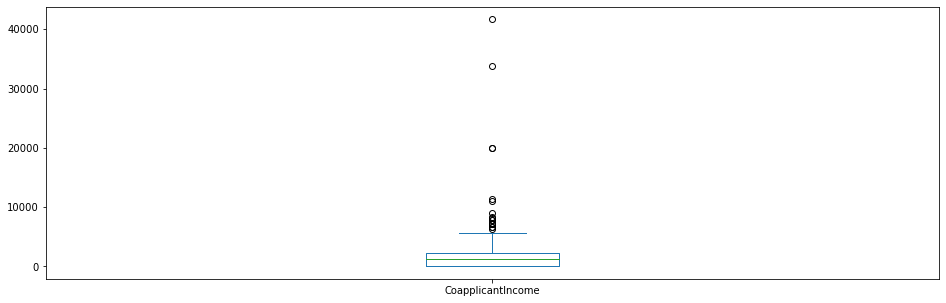

In [20]:
## CoapplicantIncome
plt.figure()
data["CoapplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

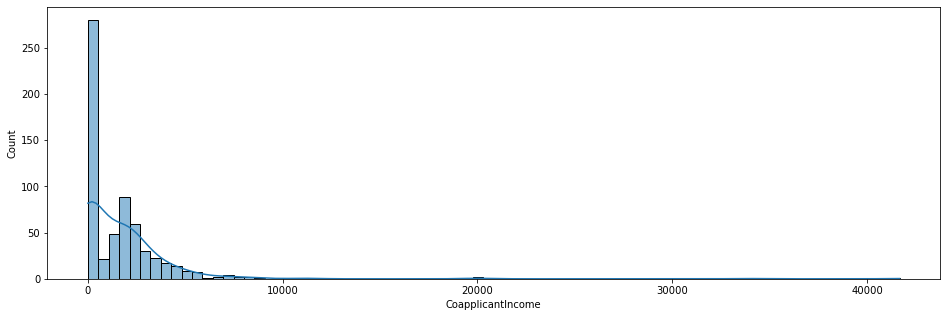

In [21]:
plt.figure(figsize=(16, 5))
sns.histplot(data["CoapplicantIncome"], kde=True)

In [22]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

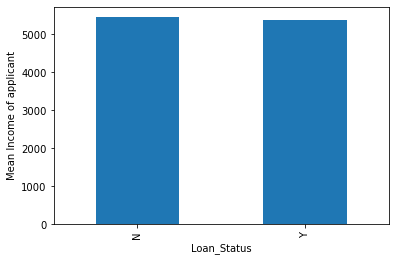

In [23]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

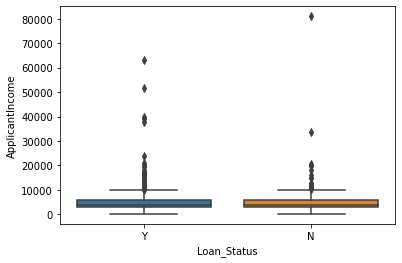

In [24]:
## Box plots
yes = data[data["Loan_Status"]=="Y"]
no  = data[data["Loan_Status"]=="N"]

plt.figure()
sns.boxplot(data=data, x="Loan_Status", y="ApplicantIncome")

In [25]:
from scipy.stats import ttest_ind

ttest_ind(yes["ApplicantIncome"], no["ApplicantIncome"])

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

#### Bin Income

In [26]:
bins=[0, 2500, 4000, 6000, 8000, 10000, 81000]
group=['Low','Average','medium', 'h1', 'h2', 'Very high']

In [27]:
data['Income_bin'] = pd.cut(data['ApplicantIncome'],bins,labels=group)

In [28]:
pd.crosstab(data["Income_bin"],data["Loan_Status"], margins=True)

Loan_Status    N    Y  All
Income_bin                
Low           34   74  108
Average       67  159  226
medium        45   98  143
h1            20   34   54
h2             9   22   31
Very high     17   35   52
All          192  422  614

In [29]:
## H0: Variables are indepenbdent
## Ha: Variables are dependent
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 17  35]]


(1.2390175474316056,
 0.941079844721327,
 5,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 16.26058632,  35.73941368]]))

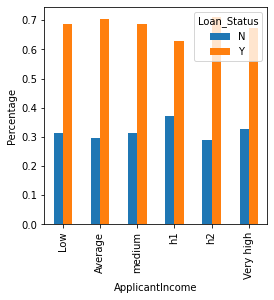

In [30]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [31]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin  TotalIncome  
0             1.0         Urban           Y     medium       5849.0  
1             1.0         Rural           N     medium       6091.0  
2             1.0         Urban           Y    Average       3000.0  
3             1.0         Urban           Y    Average       4941.0  
4             1.0         Urban           Y     medium       6000.0

In [32]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [33]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status       N    Y
TotalIncome_bin         
Low              20   27
Average          69  154
High             61  151
Very High        42   90

In [34]:
## H0: Variables are independent
## Ha: Variables are dependent
chi2_contingency(vals) # chi_stat, p-value, dof, expec

(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

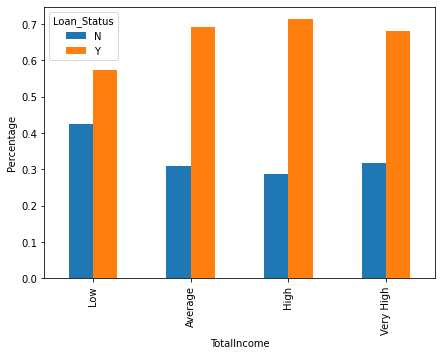

In [35]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

#### Loan Amount and Loan Term

In [36]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [38]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

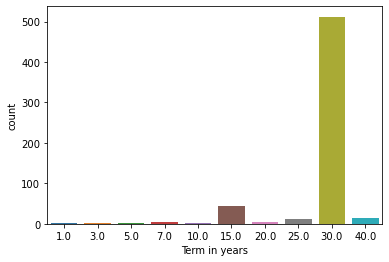

In [39]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

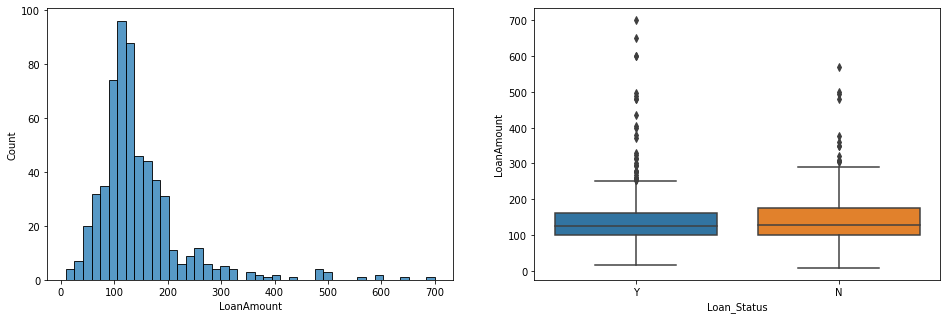

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

## Ability to pay EMI
Think of ability to pay EMI as a feature, and come up with the right feature engineering to get a better relation with target (Loan Status)

In [41]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']

In [42]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12

In [43]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN              30.0   
1             4583             1508.0       128.0              30.0   
2             3000                0.0        66.0              30.0   
3             2583             2358.0       120.0              30.0   
4             6000                0.0       141.0              30.0   

   Credit_History Property_Area Loan_Status Income_bin  TotalIncome  \
0             1.0         Urban           Y     medium       5849.0   
1             1.0         Rural           N     medium       6091.0   
2             1.0         Urban           Y    Average       3000.0   
3             1.0         Urban           Y    Average       4941.0   
4             1.0         Urban           Y     medium       6000.0   

  TotalIncome_bin  Loan_Amount_per_year         EMI  
0            High                   NaN         NaN  
1            High              4.266667  355.555556  
2             Low              2.200000  183.333333  
3         Average              4.000000  333.333333  
4            High              4.700000  391.666667

In [44]:
# HW: How to adjust this with number of dependents? Is it fair that people
# with the same salary but different dependents have the same threshold?
data['Able_to_pay_EMI'] = (data['TotalIncome']*0.1 > data['EMI']).astype('int')

In [45]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN              30.0   
1             4583             1508.0       128.0              30.0   
2             3000                0.0        66.0              30.0   
3             2583             2358.0       120.0              30.0   
4             6000                0.0       141.0              30.0   

   Credit_History Property_Area Loan_Status Income_bin  TotalIncome  \
0             1.0         Urban           Y     medium       5849.0   
1             1.0         Rural           N     medium       6091.0   
2             1.0         Urban           Y    Average       3000.0   
3             1.0         Urban           Y    Average       4941.0   
4             1.0         Urban           Y     medium       6000.0   

  TotalIncome_bin  Loan_Amount_per_year         EMI  Able_to_pay_EMI  
0            High                   NaN         NaN                0  
1            High              4.266667  355.555556                1  
2             Low              2.200000  183.333333                1  
3         Average              4.000000  333.333333                1  
4            High              4.700000  391.666667                1

<AxesSubplot:xlabel='Able_to_pay_EMI', ylabel='count'>

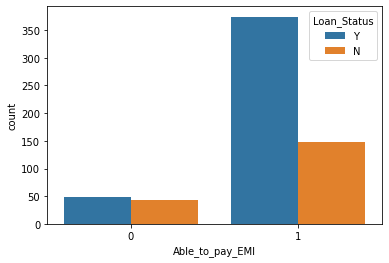

In [46]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [47]:
pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])

Loan_Status        N    Y
Able_to_pay_EMI          
0                 44   48
1                148  374

In [48]:
# chi_stat, p-value, dof, expected
# H0: The variables are independent
# Ha: The variables are dependent.
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

(12.909621328812786,
 0.0003268974206671644,
 1,
 array([[ 28.76872964,  63.23127036],
        [163.23127036, 358.76872964]]))

## Credit history and Loan status

In [49]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [50]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

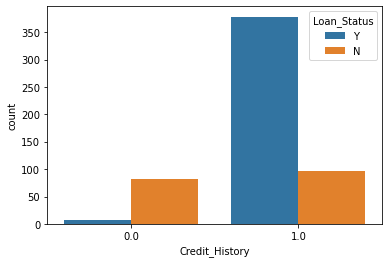

In [51]:
sns.countplot(data = data, x = 'Credit_History', hue = 'Loan_Status')

In [52]:
pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

In [53]:
# H0: The variables are independent
# Ha: The variables are dependent
# chi_stat, p-value, dof, expected
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

In [54]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN              30.0   
1             4583             1508.0       128.0              30.0   
2             3000                0.0        66.0              30.0   
3             2583             2358.0       120.0              30.0   
4             6000                0.0       141.0              30.0   

   Credit_History Property_Area Loan_Status Income_bin  TotalIncome  \
0             1.0         Urban           Y     medium       5849.0   
1             1.0         Rural           N     medium       6091.0   
2             1.0         Urban           Y    Average       3000.0   
3             1.0         Urban           Y    Average       4941.0   
4             1.0         Urban           Y     medium       6000.0   

  TotalIncome_bin  Loan_Amount_per_year         EMI  Able_to_pay_EMI  
0            High                   NaN         NaN                0  
1            High              4.266667  355.555556                1  
2             Low              2.200000  183.333333                1  
3         Average              4.000000  333.333333                1  
4            High              4.700000  391.666667                1

## Dependents vs. Loan Status

In [55]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

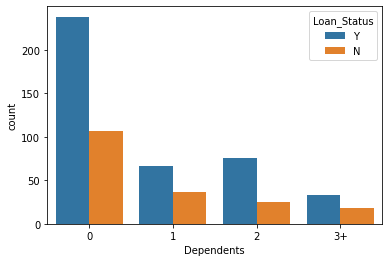

In [56]:
sns.countplot(data =data, x = 'Dependents', hue = 'Loan_Status')

In [57]:
pd.crosstab(data['Dependents'], data['Loan_Status'])

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

In [58]:
# H0: The variables are independent
# Ha: The variables are dependent
# chi_stat, p-value, dof, expected
chi2_contingency(pd.crosstab(data['Dependents'], data['Loan_Status']))

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758, 237.87145242],
        [ 31.67278798,  70.32721202],
        [ 31.36227045,  69.63772955],
        [ 15.83639399,  35.16360601]]))

## Imputation

In [59]:
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])

In [62]:
a.mean()

0    20.0
dtype: float64

In [63]:
SimpleImputer(strategy="mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [64]:
a.median()

0    10.0
dtype: float64

In [65]:
SimpleImputer(strategy="median").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [66]:
a.mode()

0
0  10.0

In [67]:
SimpleImputer(strategy="most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [68]:
SimpleImputer(strategy="constant", fill_value=0).fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [ 0.],
       [50.]])

In [69]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [70]:
data["Credit_History"].fillna(2).value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [71]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')

In [72]:
data['Self_Employed'].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [73]:
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

In [74]:
median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [75]:
cat_missing = ['Gender', 'Married','Dependents']

In [76]:
# Highest Freq imputation for some categorical columns.

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

## Categorical Encoding
 1. Label Encoding
 2. Target Encoding

In [77]:
#cat_cols.remove("Loan_ID")
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [78]:
data["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
label_encoder = LabelEncoder()

In [81]:
col="Gender"
data[col] = label_encoder.fit_transform(data[col])

In [82]:
data["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [83]:
#for col in cat_cols:
#    print(data[col].value_counts())
#    data[col] = label_encoder.fit_transform(data[col])
#    print(data[col].value_counts())

In [89]:
col = "Loan_Status"
data[col] = label_encoder.fit_transform(data[col])
print(data[col].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


## Target Encoding

In [85]:
#!pip install category_encoders

In [91]:
col='Property_Area'
data[col].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [92]:
data.groupby(col).agg({"Loan_Status": np.mean}) # since loan_status is 1's and 0's, mean gives fraction which are ones

Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416

In [94]:
from category_encoders import TargetEncoder

te = TargetEncoder()
data[col] = te.fit_transform(data[col], data['Gender'])
data[col].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

<AxesSubplot:>

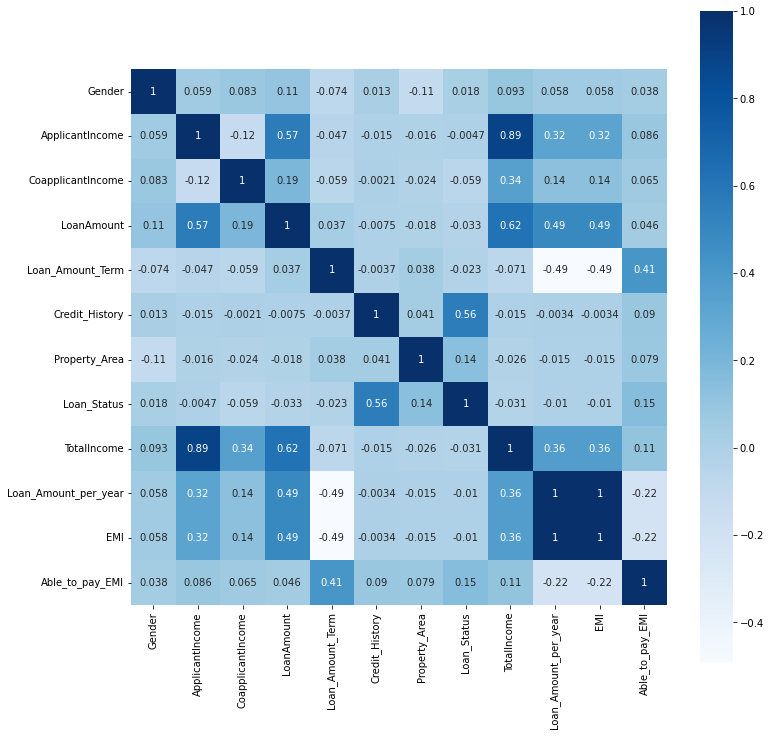

In [96]:
#PCC - One advantage of converting all our categorical variables into numerical variables.
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True, cmap="Blues")